#Importing the Required Libraries

In [ ]:
import numpy
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D
from keras.optimizers import Adam
from keras.utils import np_utils

#Loading the Data

In [ ]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

#Analyzing the Data


In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
y_train[0]

5

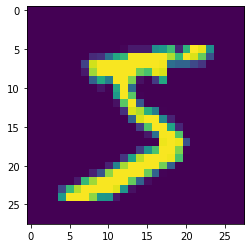

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

#Reshaping the Data

In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

#Applying One Hot Encoding

In [ ]:
number_of_classes = 10
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test, number_of_classes)

In [ ]:

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

#Add CNN layers

In [ ]:
model = Sequential()
model.add(Conv2D(64,(3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(number_of_classes, activation='softmax'))

#Compiling the Model

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

#Train the Model

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 116s 61ms/step - loss: 0.2159 - accuracy: 0.9526 - val_loss: 0.0854 - val_accuracy: 0.9723
Epoch 2/5
1875/1875 [==============================] - 115s 61ms/step - loss: 0.0646 - accuracy: 0.9807 - val_loss: 0.0795 - val_accuracy: 0.9756
Epoch 3/5
1875/1875 [==============================] - 118s 63ms/step - loss: 0.0453 - accuracy: 0.9859 - val_loss: 0.0855 - val_accuracy: 0.9777
Epoch 4/5
1875/1875 [==============================] - 119s 63ms/step - loss: 0.0353 - accuracy: 0.9890 - val_loss: 0.0911 - val_accuracy: 0.9769
Epoch 5/5
1875/1875 [==============================] - 119s 63ms/step - loss: 0.0278 - accuracy: 0.9912 - val_loss: 0.0807 - val_accuracy: 0.9790


#Observing the Metrics

In [ ]:
metrics = model.evaluate(X_test, y_test, verbose=0)
print("Metrics(Test loss & Test Accuracy): ")
print(metrics)

Metrics(Test loss & Test Accuracy): 
[0.0806543231010437, 0.9789999723434448]


#Test the Model

In [ ]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 76ms/step
[[8.9288510e-10 4.5666744e-19 2.1763796e-10 1.7737138e-07 1.1567319e-16
  1.1674565e-14 1.5657874e-19 9.9999988e-01 6.0482374e-14 1.8198470e-12]
 [1.1420724e-12 1.1824289e-10 1.0000000e+00 2.9138408e-10 1.2541458e-17
  3.1047053e-16 1.0494590e-08 1.3755036e-17 2.4758011e-09 1.0460443e-18]
 [1.5786287e-06 9.9964094e-01 8.4799631e-06 1.7809302e-07 2.0600593e-04
  1.0175145e-06 6.5457868e-08 1.7074459e-05 1.2396484e-04 6.0922008e-07]
 [9.9992490e-01 4.9482149e-15 8.5412294e-10 9.6726480e-14 2.4427618e-10
  4.1501970e-08 7.4860269e-05 2.3112716e-12 5.0769224e-12 2.8469168e-07]]


In [ ]:
import numpy as np
print(np.argmax(prediction, axis=1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


#Save the Model

In [ ]:
model.save('models/mnistCNN.h5')

#Test with Saved Model

In [ ]:
from tensorflow.keras.models import load_model
model = load_model(r'D:/IBMHDR/models/mnistCNN.h5')
from PIL import Image
import numpy as np
for index in range(4):
    img = Image.open('data/' + str(index) + '.png').convert("L")
    img = img.resize((28, 28))
    im2arr = np.array(img)
    im2arr = im2arr.reshape(1, 28, 28, 1)
    y_pred = model.predict(im2arr)
    print(y_pred)

OSError: ignored